In this notebook we will be exploring the research question : How much of an impact does educational spending have on a student's quality of education?

To answer this question we will be using a dataset with information on spending, performance and demographics from over 12,000+ different schools districts grades K-12. We will looking at at spending and how a districts level of spending affects its students test performance. We will be diving into whether demographics play a role in how well funded a district is. Lastly we will be comparing states in order to determine whether they have similar rates of high- need students and what kind of repercussions that holds. Lets dive in!

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns
import math
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt

In [ ]:
schoolsdf = pd.read_excel('/content/gdrive/MyDrive/Colab Datasets/DistrictCostDatabase_2022v2data.xlsx')

This cell imports the pandas library which we will use to pull our data set into the notebook. We read the excel file and assign it to a dataframe variable.

In [ ]:
schoolsdf.head()

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
0,2019,1700105,A-C CENTRAL CUSD 262,Illinois,IL,13138.0,10431.07,2706.928,NaN,456,0.121037,0.172330,0.006589,0.000000,0.000000,0.012136,0.029126,0.004854,0.000000,0.953883
1,2019,2700106,A.C.G.C. PUBLIC SCHOOL DISTRICT,Minnesota,MN,12663.0,10528.75,2134.252,NaN,820,0.147768,0.208078,0.019571,0.006120,0.001224,0.003672,0.077111,0.017136,0.000000,0.894737
2,2019,4500690,ABBEVILLE 60,South Carolina,SC,11132.0,14926.96,-3794.962,NaN,3027,0.244302,0.139442,0.017623,0.001661,0.002658,0.340864,0.014286,0.017276,0.000997,0.622259
3,2019,5500030,ABBOTSFORD SCHOOL DISTRICT,Wisconsin,WI,10919.0,13545.25,-2626.253,NaN,729,0.159794,0.132199,0.265092,0.000000,0.002632,0.014474,0.509211,0.006579,0.000000,0.467105
4,2019,4807380,ABBOTT ISD,Texas,TX,10282.0,13705.62,-3423.620,NaN,281,0.116110,0.119134,0.012972,0.000000,0.000000,0.007220,0.129964,0.025271,0.000000,0.837545


In [ ]:

schoolsdf.shape


(135558, 20)

We take a look at the shape of the dataframe we just created with 135,558 rows/ 20 columns worth of data.

In [ ]:

schoolsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135558 entries, 0 to 135557
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        135558 non-null  int64  
 1   leaid       135558 non-null  int64  
 2   district    135558 non-null  object 
 3   state_name  135558 non-null  object 
 4   stabbr      135558 non-null  object 
 5   ppcstot     135558 non-null  float64
 6   predcost    135558 non-null  float64
 7   fundinggap  135558 non-null  float64
 8   outcomegap  102791 non-null  float64
 9   enroll      135558 non-null  int64  
 10  pov         135558 non-null  float64
 11  iep         132708 non-null  float64
 12  ell         134273 non-null  float64
 13  amind       135558 non-null  float64
 14  asian       135558 non-null  float64
 15  black       135558 non-null  float64
 16  hisp        135558 non-null  float64
 17  multi       115899 non-null  float64
 18  pac         113396 non-null  float64
 19  wh

  We examine the datatype and column name of all 20 columns.

In [ ]:
schoolsdf_filtered = schoolsdf.dropna()

We use this method to drop all null values in order to get a more uniform set of data. A new dataframe is created without nulls.

In [ ]:
schoolsdf_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83307 entries, 12092 to 135539
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        83307 non-null  int64  
 1   leaid       83307 non-null  int64  
 2   district    83307 non-null  object 
 3   state_name  83307 non-null  object 
 4   stabbr      83307 non-null  object 
 5   ppcstot     83307 non-null  float64
 6   predcost    83307 non-null  float64
 7   fundinggap  83307 non-null  float64
 8   outcomegap  83307 non-null  float64
 9   enroll      83307 non-null  int64  
 10  pov         83307 non-null  float64
 11  iep         83307 non-null  float64
 12  ell         83307 non-null  float64
 13  amind       83307 non-null  float64
 14  asian       83307 non-null  float64
 15  black       83307 non-null  float64
 16  hisp        83307 non-null  float64
 17  multi       83307 non-null  float64
 18  pac         83307 non-null  float64
 19  white       83307 no

Check to make sure that the null values have been removed. We see our data contains a uniform 83,307 rows per column.

In [ ]:
nyschools = (schoolsdf_filtered['state_name'] == 'New York')


A new dataframe is created stricly for districts in New York state. This is to be used in our hypothesis testing.

In [ ]:
nyschools = schoolsdf_filtered.iloc[nyschools.values]

We locate and store the values of our newly filtered dataframe.

In [ ]:
nyschools.head()

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
73337,2013,3602370,ADDISON CENTRAL SCHOOL DISTRICT,New York,NY,20001.00,14034.870,5966.1360,-0.371294,1149,0.314565,0.175805,0.000000,0.003481,0.006092,0.006092,0.002611,0.007833,0.000000,0.973890
73343,2013,3605040,ADIRONDACK CENTRAL SCHOOL DISTRICT,New York,NY,17965.99,8967.001,8998.9930,-0.237045,1306,0.206372,0.124043,0.000000,0.000766,0.002297,0.003828,0.004594,0.003828,0.000766,0.983920
73354,2013,3602400,AFTON CENTRAL SCHOOL DISTRICT,New York,NY,22954.98,11597.080,11357.9000,-0.261709,582,0.205247,0.164948,0.000000,0.001718,0.013746,0.010309,0.032646,0.008591,0.000000,0.932990
73369,2013,3602430,AKRON CENTRAL SCHOOL DISTRICT,New York,NY,14794.99,7719.584,7075.4090,0.214919,1476,0.175914,0.109756,0.000000,0.121274,0.002033,0.004743,0.008130,0.003387,0.000000,0.860434
73385,2013,3602460,ALBANY CITY SCHOOL DISTRICT,New York,NY,20393.99,19760.060,633.9316,-0.389637,8157,0.282397,0.202403,0.073189,0.003433,0.082628,0.523722,0.148094,0.027706,0.000858,0.213559


Our first glimpse at our dataframe! We see the first 5 rows here. Looking good.

In [ ]:
nyschools.describe()

,year,leaid,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
count,1292.000000,1.292000e+03,1292.000000,1292.000000,1292.00000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,2012.498452,3.616768e+06,19461.812128,9115.115189,10346.69698,0.086433,4030.497678,0.154455,0.150207,0.020215,0.006120,0.028642,0.053431,0.081666,0.013309,0.001002,0.815829
std,0.500191,8.941841e+03,4608.290748,3835.872286,5513.33019,0.314558,38947.389429,0.085350,0.031330,0.039654,0.034233,0.048547,0.098741,0.119443,0.013670,0.001998,0.210579
min,2012.000000,3.600001e+06,11514.000000,1446.606000,-7691.09200,-0.948948,143.000000,0.016556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005475
25%,2012.000000,3.609382e+06,16316.747500,6441.625250,7241.12675,-0.142061,835.750000,0.083676,0.131097,0.000000,0.000313,0.005473,0.009242,0.015003,0.003659,0.000000,0.763740
50%,2012.000000,3.616955e+06,18552.500000,8590.945000,9557.75400,0.058727,1538.000000,0.144943,0.147663,0.005167,0.001671,0.011955,0.017668,0.031441,0.009121,0.000385,0.907800
75%,2013.000000,3.624270e+06,21801.757500,11137.547500,12826.58000,0.286513,3224.500000,0.208596,0.168069,0.018932,0.003761,0.029843,0.046155,0.096670,0.018535,0.001207,0.951537
max,2013.000000,3.632010e+06,63591.800000,29955.570000,53997.08000,1.014825,990145.000000,0.477264,0.304771,0.304412,0.653846,0.539546,0.768982,0.780871,0.093002,0.025035,1.000000


The describe method is used to pull out descriptive statistics of the NY school dataframe.

In [ ]:
mi_schools = (schoolsdf_filtered['state_name'] == 'Missouri')
mi_schools = schoolsdf_filtered.iloc[mi_schools.values]


Now to make the dataframe corresponding to districts in Missouri.

In [ ]:
mi_schools.head(3)

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
12125,2018,2922980,ADAIR CO. R-I,Missouri,MO,11928.000,14567.520,-2639.527,-0.030937,221,0.233010,0.131222,0.000000,0.000000,0.004525,0.000000,0.000000,0.0,0.004525,0.990950
12147,2018,2902850,ADRIAN R-III,Missouri,MO,9534.000,7532.284,2001.716,0.308765,693,0.177305,0.092352,0.000000,0.002886,0.001443,0.008658,0.004329,0.0,0.000000,0.982684
12149,2018,2902880,ADVANCE R-IV,Missouri,MO,8348.002,9983.696,-1635.694,0.073586,469,0.166667,0.119403,0.008529,0.002132,0.000000,0.004264,0.019190,0.0,0.000000,0.974414


Check that everything looks good.


In [ ]:
mi_schools.describe()

,year,leaid,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
count,3370.000000,3.370000e+03,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000
mean,2014.482196,2.918722e+06,9304.055574,11041.156303,-1737.100727,0.009590,2086.668843,0.212881,0.137598,0.014198,0.004336,0.008161,0.056329,0.032493,0.016351,0.001174,0.881155
std,2.291300,8.747528e+03,1717.817906,4075.973247,3977.595962,0.241371,3705.413681,0.088923,0.036153,0.033511,0.010062,0.016092,0.144301,0.052188,0.019773,0.005819,0.169759
min,2011.000000,2.900001e+06,4944.000000,1955.989000,-17357.320000,-0.926793,118.000000,0.028711,0.037344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002688
25%,2012.000000,2.911550e+06,8229.251000,8355.434000,-4062.975000,-0.132568,402.000000,0.149105,0.113816,0.000000,0.000000,0.000677,0.004305,0.008513,0.000000,0.000000,0.875113
50%,2014.000000,2.919200e+06,9025.000000,10540.715000,-1552.491500,0.003296,757.500000,0.207164,0.134414,0.002260,0.002394,0.004000,0.011181,0.018237,0.009432,0.000000,0.945132
75%,2016.000000,2.926580e+06,10021.500000,13175.320000,773.078825,0.146778,1959.750000,0.266655,0.156725,0.009897,0.005348,0.008175,0.030174,0.032375,0.024935,0.000826,0.967067
max,2018.000000,2.932490e+06,21666.990000,28709.330000,15209.770000,1.302254,32364.000000,0.550725,0.435456,0.254688,0.198238,0.202991,0.991399,0.394118,0.244771,0.267496,1.000000


  Descriptive stats for Missouri.

In [ ]:
schoolsdf_filtered.describe()

,year,leaid,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
count,83307.000000,8.330700e+04,83307.000000,83307.000000,83307.000000,83307.000000,83307.000000,83307.000000,83307.000000,83307.000000,83307.000000,83307.000000,83307.000000,83307.000000,83307.000000,83307.000000,83307.000000
mean,2014.196754,2.942567e+06,11204.186958,11012.353522,191.833466,0.029700,4151.448750,0.181289,0.139362,0.049695,0.024544,0.021943,0.079782,0.142166,0.026888,0.001415,0.703261
std,2.511788,1.479978e+06,3558.234107,4808.787333,5859.975116,0.360062,14262.613398,0.099077,0.043145,0.093606,0.098988,0.051020,0.164221,0.207897,0.033774,0.004401,0.275955
min,2009.000000,1.000050e+05,403.000200,136.440400,-27661.830000,-2.738080,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,1.803330e+06,8900.999000,7635.913000,-3272.011000,-0.194891,619.000000,0.105263,0.110092,0.002169,0.000743,0.002551,0.005877,0.020997,0.007683,0.000000,0.543245
50%,2014.000000,2.917000e+06,10239.000000,10197.460000,256.501000,0.031610,1436.000000,0.166300,0.136249,0.012605,0.002548,0.006693,0.014988,0.051540,0.019185,0.000260,0.812426
75%,2016.000000,4.102875e+06,12498.000000,13454.270000,3648.307000,0.251120,3489.000000,0.241902,0.165125,0.050459,0.006742,0.017663,0.060889,0.156450,0.035266,0.001416,0.924695
max,2018.000000,5.606240e+06,130849.100000,47415.960000,83433.170000,1.618230,990145.000000,0.722989,0.983871,0.956740,1.000000,0.747499,0.998914,1.000000,0.990291,0.267496,1.000000


Nationwide descriptive stats.

In [ ]:
#Testing our first null hypothesis:There is no significant difference in test performance between districts that receive sufficient adequate spending per pupil and those that do not.
stats.pearsonr(schoolsdf_filtered['fundinggap'], schoolsdf_filtered['outcomegap'])

(0.6808755921732279, 0.0)

Conduct a pearsons correlation test on the nationwide data to see if theres a relationship betweeen funding gap and outcome gap on standardized exams. We find a moderately positive correlation.

Text(0.5, 1.0, 'Districts Nationwide')

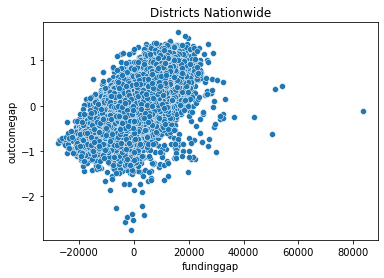

In [ ]:
sns.scatterplot(x="fundinggap", y="outcomegap", data=schoolsdf_filtered)
plt.title('Districts Nationwide')

Plotting the nationwide relationship between funding gap & outcome gap.

In [ ]:
adequate_spending = (schoolsdf_filtered['fundinggap'] >= 0)
adequate_spending = schoolsdf_filtered.iloc[adequate_spending.values,[0,3,5,6,7,8]]

A new object is created for districts that meet adequate spending requirements. Includes only relevant test variables.

In [ ]:
adequate_spending

,year,state_name,ppcstot,predcost,fundinggap,outcomegap
12092,2018,Illinois,12599.000,11468.200,1130.8040,-0.510199
12093,2018,Minnesota,12636.000,10590.180,2045.8240,0.138717
12101,2018,South Dakota,8784.012,6725.998,2058.0140,0.186303
12102,2018,Texas,11353.000,9705.772,1647.2290,-0.189030
12103,2018,Kansas,11299.000,8811.405,2487.6000,0.129703
...,...,...,...,...,...,...
135472,2009,New Jersey,13465.000,1761.890,11703.1100,0.676479
135529,2009,California,8045.003,7366.191,678.8120,-0.338975
135533,2009,California,7778.003,7622.607,155.3965,-0.335867
135535,2009,Alaska,14542.000,9834.488,4707.5070,-0.692845


In [ ]:
inadequate_spending = (schoolsdf_filtered['fundinggap'] < 0)
inadequate_spending = schoolsdf_filtered.iloc[inadequate_spending.values,[0,3,5,6,7,8]]


Dataframe for districts with insufficient spending per pupil.

In [ ]:
inadequate_spending

,year,state_name,ppcstot,predcost,fundinggap,outcomegap
12094,2018,South Carolina,10799.000,14588.85,-3789.8550,0.174867
12095,2018,Wisconsin,10956.000,13661.53,-2705.5320,-0.418274
12096,2018,Texas,9255.001,12768.63,-3513.6290,0.183976
12097,2018,California,11075.000,13334.09,-2259.0860,0.302669
12098,2018,Idaho,8470.000,14230.50,-5760.4950,-0.293363
...,...,...,...,...,...,...
135430,2009,New Jersey,13441.000,17947.76,-4506.7590,-0.387363
135445,2009,California,9181.997,25030.46,-15848.4600,-0.150690
135451,2009,Massachusetts,14985.000,15427.95,-442.9424,-0.104465
135466,2009,California,8893.999,14491.00,-5596.9970,-0.218971


In [ ]:
stats.ttest_ind(adequate_spending['outcomegap'], inadequate_spending['outcomegap'])

Ttest_indResult(statistic=190.43097564073776, pvalue=0.0)

 A t-test is conducted to determine whether there is a significant difference in the mean outcome gap between these two populations. We find that there is infact a statistically significant difference between the outcome gap of these two sample populations!

In [ ]:
#setting up samples sizes,means and var for confidence intervals
sample_1_n = adequate_spending.shape[0]
sample_2_n = inadequate_spending.shape[0]
sample_1_mean = adequate_spending['outcomegap'].mean()
sample_2_mean = inadequate_spending['outcomegap'].mean()
sample_1_var =adequate_spending['outcomegap'].var()
sample_2_var = inadequate_spending['outcomegap'].var()

In [ ]:
# Calculating the standard error and computing the confidence intervals.

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+" standard deviations.")

The difference in means at the 95% confidence interval is between -0.40099462925239626 and -0.39284028022179707 standard deviations.


We can be 95% certain that school districts with inadequate spending per pupil tend to perform between 0.393-0.401 standard deviations worse on avgerage test scores(math and reading combined) than districts who recieve sufficent spending per pupil.

In [ ]:
#Test Null Hypothesis 2:There is no significant difference in the funding gap between predominantly white districts (defined as having a white population of 50% and above) 
#and districts that are predominantly inhabited by all other ethnicities.
schoolsdf_filtered.head()

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,pov,iep,ell,amind,asian,black,hisp,multi,pac,white
12092,2018,1700105,A-C CENTRAL CUSD 262,Illinois,IL,12599.000,11468.20,1130.804,-0.510199,436,0.131579,0.192661,0.006881,0.000000,0.000000,0.018349,0.034404,0.009174,0.000000,0.938073
12093,2018,2700106,A.C.G.C. PUBLIC SCHOOL DISTRICT,Minnesota,MN,12636.000,10590.18,2045.824,0.138717,832,0.151606,0.195913,0.012019,0.008414,0.004808,0.002404,0.079327,0.015625,0.000000,0.889423
12094,2018,4500690,ABBEVILLE 60,South Carolina,SC,10799.000,14588.85,-3789.855,0.174867,3011,0.266446,0.141149,0.018266,0.001993,0.002989,0.341083,0.014945,0.019595,0.001329,0.618067
12095,2018,5500030,ABBOTSFORD SCHOOL DISTRICT,Wisconsin,WI,10956.000,13661.53,-2705.532,-0.418274,750,0.136691,0.129333,0.281333,0.000000,0.004016,0.009371,0.485944,0.008032,0.000000,0.492637
12096,2018,4807380,ABBOTT ISD,Texas,TX,9255.001,12768.63,-3513.629,0.183976,290,0.085714,0.113793,0.017241,0.000000,0.000000,0.003448,0.162069,0.027586,0.000000,0.806897


In [ ]:
def f(row):
    if row['white'] >= .50 :
        val = 1
    elif row['white'] < .50:
        val = 0
    else:
        val = 'invalid'
    return val

We create a function to be used to split our dataframe based on the criteria of our second hypothesis. In which case districts with a demographic of 50% or more white populations versus those with less than 50% white.

In [ ]:
schoolsdf_filtered['Above 50% White'] = schoolsdf_filtered.apply(f, axis=1)

We add a column that returns true (1) for districts that have a demographic that is 50% white and above and returns (0) for districts that have a population consisting of less than 50% white.

In [ ]:
schoolsdf_filtered

,year,leaid,district,state_name,stabbr,ppcstot,predcost,fundinggap,outcomegap,enroll,...,iep,ell,amind,asian,black,hisp,multi,pac,white,Above 50% White
12092,2018,1700105,A-C CENTRAL CUSD 262,Illinois,IL,12599.000,11468.200,1130.8040,-0.510199,436,...,0.192661,0.006881,0.000000,0.000000,0.018349,0.034404,0.009174,0.000000,0.938073,1
12093,2018,2700106,A.C.G.C. PUBLIC SCHOOL DISTRICT,Minnesota,MN,12636.000,10590.180,2045.8240,0.138717,832,...,0.195913,0.012019,0.008414,0.004808,0.002404,0.079327,0.015625,0.000000,0.889423,1
12094,2018,4500690,ABBEVILLE 60,South Carolina,SC,10799.000,14588.850,-3789.8550,0.174867,3011,...,0.141149,0.018266,0.001993,0.002989,0.341083,0.014945,0.019595,0.001329,0.618067,1
12095,2018,5500030,ABBOTSFORD SCHOOL DISTRICT,Wisconsin,WI,10956.000,13661.530,-2705.5320,-0.418274,750,...,0.129333,0.281333,0.000000,0.004016,0.009371,0.485944,0.008032,0.000000,0.492637,0
12096,2018,4807380,ABBOTT ISD,Texas,TX,9255.001,12768.630,-3513.6290,0.183976,290,...,0.113793,0.017241,0.000000,0.000000,0.003448,0.162069,0.027586,0.000000,0.806897,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135529,2009,643380,YREKA UNION ELEMENTARY,California,CA,8045.003,7366.191,678.8120,-0.338975,1011,...,0.048467,0.033630,0.172107,0.025717,0.016815,0.114738,0.001978,0.000000,0.668645,1
135532,2009,643470,YUBA CITY UNIFIED,California,CA,8084.011,11177.840,-3093.8310,-0.240772,13286,...,0.104170,0.195093,0.010166,0.164771,0.026357,0.323066,0.092853,0.004368,0.378417,0
135533,2009,643560,YUCAIPA-CALIMESA JOINT UNIFIED,California,CA,7778.003,7622.607,155.3965,-0.335867,9894,...,0.098241,0.089145,0.008220,0.023341,0.015121,0.317232,0.042825,0.003450,0.589811,1
135535,2009,200862,YUKON-KOYUKUK SCHOOL DISTRICT,Alaska,AK,14542.000,9834.488,4707.5070,-0.692845,1413,...,0.098372,0.007077,0.309979,0.007785,0.017693,0.019816,0.043878,0.013447,0.587403,1


Presenting our dataframe with our newly added column.

In [ ]:
predominantly_white = (schoolsdf_filtered['Above 50% White'] == 1)
predominantly_white = schoolsdf_filtered.iloc[predominantly_white.values,[2,4,7,13,14,15,16,17,18,19]]

Using the added column we create a data frame for primarily white districts.

In [ ]:
#Looks good!
predominantly_white.head()

,district,stabbr,fundinggap,amind,asian,black,hisp,multi,pac,white
12092,A-C CENTRAL CUSD 262,IL,1130.8040,0.000000,0.000000,0.018349,0.034404,0.009174,0.000000,0.938073
12093,A.C.G.C. PUBLIC SCHOOL DISTRICT,MN,2045.8240,0.008414,0.004808,0.002404,0.079327,0.015625,0.000000,0.889423
12094,ABBEVILLE 60,SC,-3789.8550,0.001993,0.002989,0.341083,0.014945,0.019595,0.001329,0.618067
12096,ABBOTT ISD,TX,-3513.6290,0.000000,0.000000,0.003448,0.162069,0.027586,0.000000,0.806897
12100,ABERDEEN SCHOOL DISTRICT,WA,-835.6631,0.032606,0.020961,0.009316,0.320524,0.073945,0.002038,0.540611


In [ ]:
minorly_white = (schoolsdf_filtered['Above 50% White'] == 0)
minorly_white = schoolsdf_filtered.iloc[minorly_white.values,[2,4,7,13,14,15,16,17,18,19]]

We create a dataframe for minorly white districts.

In [ ]:
minorly_white['fundinggap'].mean()

-5132.69920381637

In [ ]:
predominantly_white['fundinggap'].mean()

1703.9840029503555

Checking means for the two district populations.

In [ ]:
stats.ttest_ind(predominantly_white['fundinggap'], minorly_white['fundinggap'])

Ttest_indResult(statistic=159.73495711836668, pvalue=0.0)

We find a statistically significant difference in funding gap between these two district groups!

Text(0.5, 1.0, 'Nationwide Relationship by Demographic Criteria')

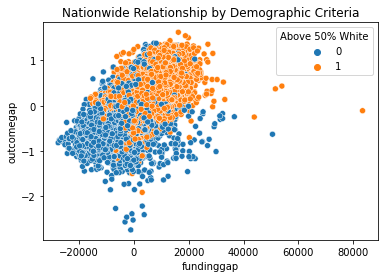

In [ ]:
sns.scatterplot(x="fundinggap", y="outcomegap", hue="Above 50% White", data=schoolsdf_filtered)
plt.title('Nationwide Relationship by Demographic Criteria')


We plot the relationship between funding gap and outcome gap which, we previously tested using the criteria of primarily white districts vs minorly white districts as a distinguishing factor.

In [ ]:
#setting up samples sizes,means and var for confidence intervals
sample_1_n2 = predominantly_white.shape[0]
sample_2_n2 = minorly_white.shape[0]
sample_1_mean2 = predominantly_white['fundinggap'].mean()
sample_2_mean2 = minorly_white['fundinggap'].mean()
sample_1_var2 = predominantly_white['fundinggap'].var()
sample_2_var2 = minorly_white['fundinggap'].var()

In [ ]:
std_err_difference2 = math.sqrt((sample_1_var2/sample_1_n2)+(sample_2_var2/sample_2_n2))

mean_difference2 = sample_2_mean2 - sample_1_mean2

margin_of_error2 = 1.96 * std_err_difference2
ci_lower2 = mean_difference2 - margin_of_error2
ci_upper2 = mean_difference2 + margin_of_error2

print("The difference in means at the 95% confidence interval is between "+str(ci_lower2)+" and "+str(ci_upper2)+".")

The difference in means at the 95% confidence interval is between -6929.928972368606 and -6743.437441164845.


We can be 95% certain that districts that are not predominatly white (less than 50%) have a funding gap deficiency between 6743.44-6929.93 dollars per pupil when compared to dominatly white districts.

In [ ]:
#Testing our 3rd and final null hypothesis:There is no significant difference in the percentage of districts that serve high-need students between the states of Missouri and New York.
#Check the average poverty rate for the entire state of New York.
nyschools['pov'].mean()


0.15445542639318893

In [ ]:
#Check the average poverty rate for the state of Missouri.
mi_schools['pov'].mean()

0.21288125522255208

In [ ]:
#checking the national average.
schoolsdf_filtered['pov'].mean()

0.1812892252883901

In [ ]:
stats.ttest_ind(nyschools['pov'], mi_schools['pov'])

Ttest_indResult(statistic=-20.30207218144671, pvalue=7.055668738621077e-88)

We conduct a t-test to find that there is a statistically significant difference between these two states in the percentage of districts serving high-need students(living in poverty).

In [ ]:
stats.pearsonr(schoolsdf_filtered['pov'], schoolsdf_filtered['outcomegap'])

(-0.6741378420402084, 0.0)

We see there is a modest negative nationwide correlation between districts with higher populations of students living in poverty and outcome gaps on exams. We've already tested for the influence of spending on student test scores. Now we see that different states may hold unique challenges in the populations they are tasked with educating.

Text(0.5, 1.0, 'District Poverty Rates & Outcome Gaps')

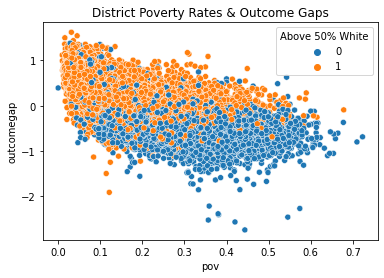

In [ ]:
sns.scatterplot(x="pov", y="outcomegap", hue="Above 50% White", data=schoolsdf_filtered)
plt.title('District Poverty Rates & Outcome Gaps')

A visualization depicting the relationship between poverty rates and outcome gap. We see districts with higher rates of poverty belong mainly to districts with minorly white populations. We also see a drop in outcomegap with higher poverty rates as most of the districts with the highest oucome gaps are 
A.Primarily white and 
B.Contain less to no populations of high-need students.

In embarking on this data journey we have learned the importance of districts having sufficient spending per pupil on student test performance. Those with insufficient spending perform up to 0.401 to 0.393 standard deviations worse on national exams than their well funded counterparts. This a signiciant difference in test exams and as a result state, federal and other educational institutions should take not and strive to ensure that districts are receiving the adequate amount of funding per pupil to ensure optimal performance.

Next, we looked at the demographics of each districts to determine whether all districts regardless of their dominant ethnicity were receiving adequate funding for their students. We found with 95% certainty that districts with a demographic of less than 50% white students were receiving between 6743.44-6929.93 less funding per pupil than their predominatly white counterparts(50% of more). This is a significant difference in funding that should be taken very seriously by state and federal governments. All students should recieve equal educational opportunities regardless of their race or ethnicity. 

Lastly, we looked at districts serving high-need students(students ages 5-17 living in poverty). We found that the average percentage of Missouri districts serving high-need students was 21.3% percent of a bit more than 1 out of 5 students, a statistically significant difference when compared to New York's  15.4%. We understand the importance of funding on student perfermance and outcome from our previous testing, this is more concretely true for high-need students who many not have the resources at home or in school to receive a high quality of educations or at least one on par with their peers. These should be considered populations of high importance for lawmakers and educational funding institution, most importantly the local and state governments whose task it is to provide appropriate educational opportunities for these students. The saying a rising tide lifts all ships is true in this case. Extending a helping hand to these populations can go a long way in imporving the overall quality of education in the United States and not just for any one group. 